In [1]:
from utils import get_root_dir, load_yaml_param_settings
from preprocessing.data_pipeline import build_data_pipeline
from preprocessing.preprocess_ucr import UCRDatasetImporter
import matplotlib.pyplot as plt

config_dir = get_root_dir().joinpath("configs", "config.yaml")
config = load_yaml_param_settings(config_dir)
config["dataset"]["dataset_name"] = "StarLightCurves"
dataset_importer = UCRDatasetImporter(**config["dataset"])
train_data_loader = build_data_pipeline(config["dataset"]["batch_sizes"]["stage1"], dataset_importer, config, "train")

/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


self.X_train.shape: (1000, 1024)
self.X_test.shape: (8236, 1024)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]


In [14]:
datasets = [
    "ElectricDevices",
    "FordB",
    "FordA",
    "Wafer",
    "TwoPatterns",
    "StarLightCurves",
    "UWaveGestureLibraryAll",
    "ECG5000",
    "ShapesAll",
    "Mallat",
    "Symbols",
    "SonyAIBORobotSurface2",
    "SonyAIBORobotSurface1",
]

self.X_train.shape: (8926, 96)
self.X_test.shape: (7711, 96)
# unique labels (train): [0 1 2 3 4 5 6]
# unique labels (test): [0 1 2 3 4 5 6]


/tmp/ipykernel_113327/320696686.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  separated[int(y)].append(X[i])
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fa03d4d9050>>
Traceback (most recent call last):
  File "/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: 'plots/ElectricDevices.png'

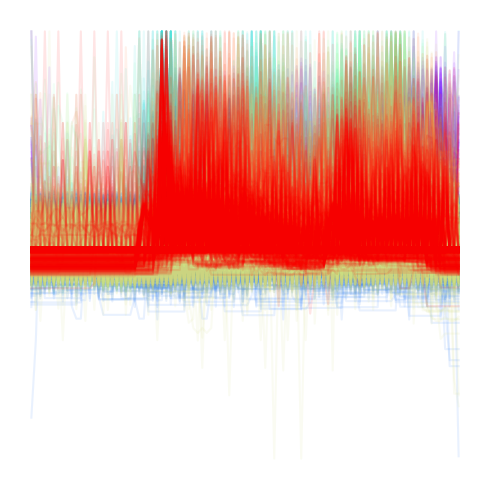

In [2]:
# datasets = [
#     "ElectricDevices",
#     "FordB",
#     "FordA",
#     "Wafer",
#     "TwoPatterns",
#     "StarLightCurves",
#     "UWaveGestureLibraryAll",
#     "ECG5000",
#     "ShapesAll",
#     "Mallat",
#     "Symbols",
#     "SonyAIBORobotSurface2",
#     "SonyAIBORobotSurface1",
# ]

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np
# from collections import defaultdict

# def plot_dataset(dataset):
#     config["dataset"]["dataset_name"] = dataset
#     dataset_importer = UCRDatasetImporter(**config["dataset"])

#     X = dataset_importer.X_train
#     Y = dataset_importer.Y_train

#     separated = defaultdict(list)
#     for i, y in enumerate(Y):
#         separated[int(y)].append(X[i])

#     # Create a color map
#     colors = cm.rainbow(np.linspace(0, 1, len(separated)))

#     plt.figure(figsize=(5, 5))
#     plt.axis("off")
#     # Plot the data with a different color for each label
#     for label, color in zip(separated, colors):
#         for data in separated[label]:
#             plt.plot(data, color=color, alpha=0.1)

#     plt.tight_layout()
#     plt.savefig(f"plots/{dataset}.png")
#     plt.show()

# for dataset in datasets:
#     plot_dataset(dataset)


self.X_train.shape: (8926, 96)
self.X_test.shape: (7711, 96)
# unique labels (train): [0 1 2 3 4 5 6]
# unique labels (test): [0 1 2 3 4 5 6]
torch.Size([104, 1024])


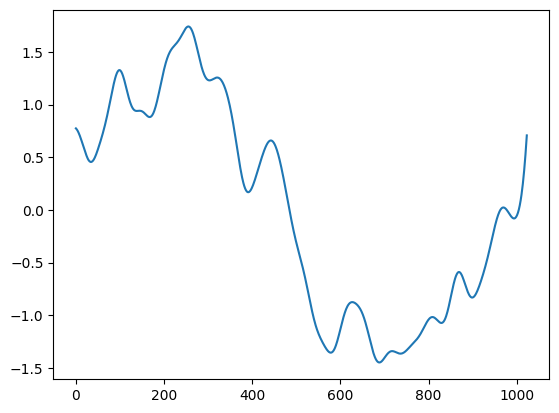

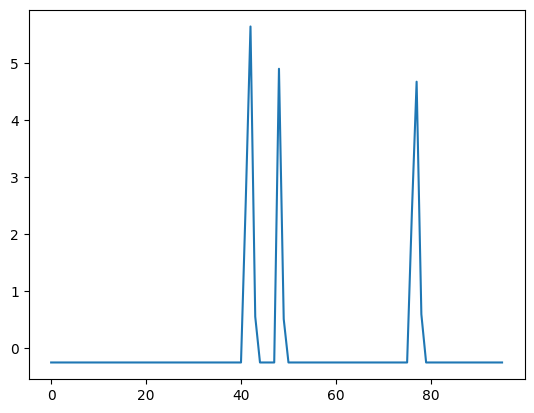

In [23]:
from preprocessing.augmentations import Augmenter

augmenter = Augmenter(**config["augmentations"])

for batch in train_data_loader:
    x, y = batch
c = config.copy()
c["dataset"]["dataset_name"] = "ElectricDevices"
dataset_importer2 = UCRDatasetImporter(**c["dataset"])
train_data_loader2 = build_data_pipeline(c["dataset"]["batch_sizes"]["stage2"], dataset_importer2, c, "train") 

for batch in train_data_loader2:
    x2, y2 = batch
    break
x2 = x2.squeeze(1)
x = x.squeeze(1)
print(x.shape)
plt.plot(x[0, :])
plt.show()
plt.plot(x2[0, :])

In [36]:
import numpy as np
import matplotlib.cm as cm
ids = np.random.randint(0, x.shape[0], 1)
i = 1
x_s = x[i]
x_s2 = x2[i]
n_samples = 100
warp = [augmenter.time_augmenter.add_window_warp(augmenter.time_augmenter.add_magnitude_warp(x_s)) for i in range(n_samples)]
gauss = [augmenter.time_augmenter.add_gaussian_noise(x_s) for i in range(n_samples)]
sliceshuffle = [augmenter.time_augmenter.add_slice_and_shuffle(x_s2) for i in range(n_samples)]

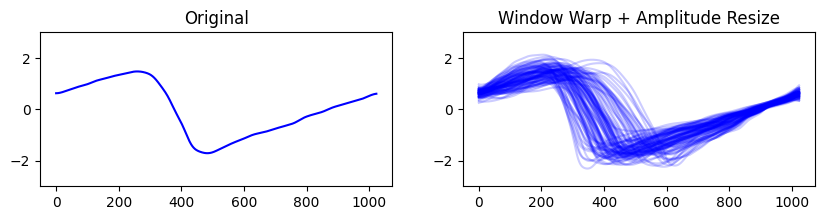

In [37]:
f, a = plt.subplots(1, 2, figsize=(10, 2))
colors = cm.rainbow(np.linspace(0, 1, n_samples))
a[0].set_ylim(-3, 3); a[1].set_ylim(-3, 3)
a[0].plot(x_s, color="blue")
a[0].set_title("Original")
for i in range(n_samples):
    a[1].plot(warp[i], alpha=0.2, color="blue")
    if i == 0:
        a[1].set_title(r"$T_\text{warp}$ samples", fontsize=12)
plt.savefig("warp.png")

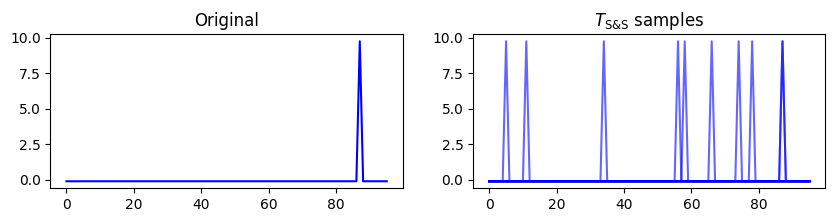

In [56]:

x_s2 = x2[np.random.randint(0, len(x2))]

sliceshuffle = [augmenter.time_augmenter.add_slice_and_shuffle(x_s2) for i in range(n_samples)]

f, a = plt.subplots(1, 2, figsize=(10, 2))
colors = cm.rainbow(np.linspace(0, 1, 10))
a[0].plot(x_s2, color="blue")
a[0].set_title("Original")
for i in range(10):
    a[1].plot(sliceshuffle[i], alpha=0.6, color="blue")
    if i == 0:
        a[1].set_title(r"$T_\text{S\&S}$ samples", fontsize=12)
plt.savefig("slice.png")

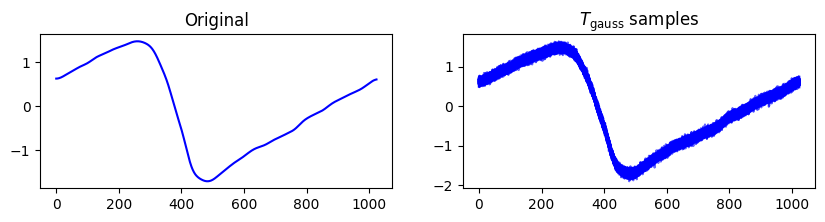

In [57]:
f, a = plt.subplots(1, 2, figsize=(10, 2))
colors = cm.rainbow(np.linspace(0, 1, n_samples))
a[0].plot(x_s, color="blue")
a[0].set_title("Original")
for i in range(100):
    a[1].plot(gauss[i], alpha=0.6, color="blue")
    if i == 0:
        a[1].set_title(r"$T_\text{gauss}$ samples", fontsize=12)
plt.savefig("gauss.png")

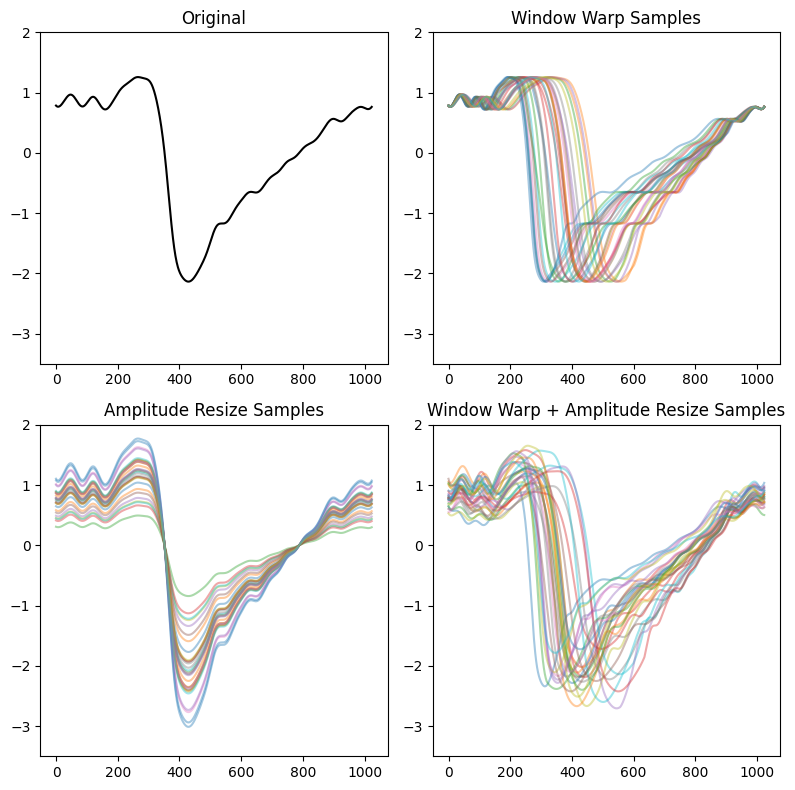

In [84]:
f, a = plt.subplots(2, 2, figsize=(8, 8))
min, max = -3.5, 2
a[0][0].set_title("Original"); a[0][0].set_ylim(min, max)
a[0][1].set_title("Window Warp Samples"); a[0][1].set_ylim(min, max)
a[1][0].set_title("Amplitude Resize Samples"); a[1][0].set_ylim(min, max)
a[1][1].set_title("Window Warp + Amplitude Resize Samples"); a[1][1].set_ylim(min, max)
for i in range(30):
    if i == 0:
        a[0][0].plot(x_s, c="black")
    a[0][1].plot(window_warp[i], alpha=0.4)
    a[1][0].plot(magnitude_warp[i], alpha=0.4)
    a[1][1].plot(combined[i], alpha=0.4)
plt.tight_layout()
plt.savefig("augmentation_samples.pdf")

In [11]:
import numpy as np
X = dataset_importer.X_train
Y = dataset_importer.Y_train

counts = [np.sum(Y==i) for i in np.unique(Y)]
for i in range(len(counts)):
    print("label {} count:".format(i), counts[i])

print("input length:", len(X[0]))

label 0 count: 727
label 1 count: 2231
label 2 count: 851
label 3 count: 1474
label 4 count: 2406
label 5 count: 509
label 6 count: 728
input length: 96


In [84]:
X_class = X[np.where(Y == 0)]

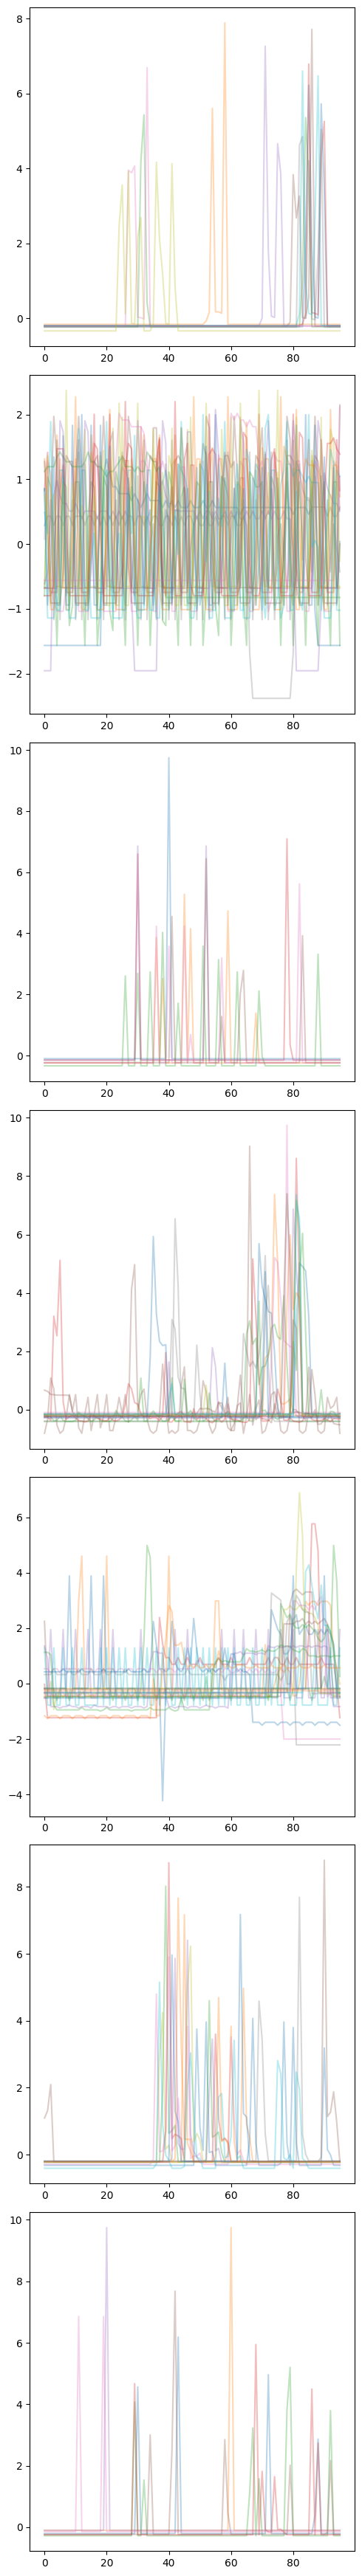

In [44]:
labels = np.unique(Y)
f, a = plt.subplots(len(labels), 1, figsize=(5, 5*len(labels)))

# Sample from X
n_samples = 100
samples = np.random.choice(np.arange(len(X)), n_samples)
X_samples = X[samples]
Y_samples = Y[samples]

for i in range(int(len(X_samples))):
    x, y = X_samples[i], Y_samples[i]

    a[y][0].plot(x, alpha=0.3)

plt.tight_layout()
plt.show()

In [85]:
from evaluation.model_eval import Evaluation
import os
import re
from collections import defaultdict
from sklearn.manifold import TSNE


In [80]:
directory = 'saved_models/'

def relevant_model(model_name):
    parts = model_name.split('-')
    #Get maskgits
    relevant = 'maskgit' in parts
        
    # dont include decorr
    relevant &= 'decorr' not in parts

    return relevant



def search_relevant_ids(config):

    def is_relevant(model_name, dataset_name, seed, method):
        parts = model_name.split('-')
        #Get maskgits
        relevant = 'maskgit' in parts
        
        # dont include decorr
        relevant &= 'decorr' not in parts

        relevant &= dataset_name == parts[-1][:-5] #len(.ckpt) = 5
        relevant &= seed == parts[-3]

        return relevant


    dataset_name = config["dataset"]["dataset_name"]
    seed = config["seed"]
    method = config["SSL"]["stage1_method"]

    ids = []
    for model_name in os.listdir("saved_models"):
        if not relevant_model(model_name): continue

        parts = model_name.split('-')
        if dataset_name != parts[-1][:-5]: continue
        if seed != parts[-3]: continue


        if method != "":
            if method != parts[-4]: continue
        ids.append(parts[-2])

    return ids

def group_relevants_by_datasets(list_dirs):
    data = defaultdict(list)
    for model_name in list_dirs:
        if not relevant_model(model_name): continue
        dataset_name = model_name.split('-')[-1][:-5] #len(.ckpt) = 5
        data[dataset_name].append(model_name)
    return data

def fill_config(model_name):
    parts = model_name.split('-')

    config_dir = get_root_dir().joinpath("configs", "config_empty.yaml")
    config = load_yaml_param_settings(config_dir)
    c = config.copy()

    method = ""
    if 'barlowtwins' in parts:
        method = 'barlow_twins'
    elif 'vibcreg' in parts:
        method = 'vibcreg'
    
    c["SSL"]["stage1_method"] = method

    c["dataset"]["dataset_name"] = parts[-1][:-5] #len(.ckpt) = 5
    
    c["seed"] = parts[-3] #search for single index. Equals seed
    
    c["ID"] =  parts[-2]

    return c

def train_and_predict(x_gen, x_test, y):
    


def test_saved_models(directiory, gpu_device_index):

    data = group_relevants_by_datasets(os.listdir(directiory))
    config_dir = get_root_dir().joinpath("configs", "config_empty.yaml")
    c = load_yaml_param_settings(config_dir)

    for dataset_name in data.keys:
        c['dataset']['dataset_name'] = dataset_name

        dataset_importer = UCRDatasetImporter(**c["dataset"])

        evaluation = Evaluation(
            subset_dataset_name=dataset_name,
            gpu_device_index=gpu_device_index,
            config=c,
            batch_size=c["dataset"]["batch_sizes"]["stage2"]
        )

        for model_name in data[dataset_name]:

            n_classes = len(np.unique(dataset_importer.Y))
            input_length = len(dataset_importer.X_train[0])

            c = fill_config(model_name)
            #prodeed on regular version:
            if c["SSL"]["stage1_method"] == "":
                n_samples =  max(evaluation.X_test[0], config["dataset"]["batch_sizes"]["stage2"])
                unconditional_gen = evaluation.sampleMaskGit(
                    n_samples,
                    input_length,
                    n_classes,
                    "unconditional",
                )

                for c in range(n_classes):
                    cond_gen = evaluation.sampleMaskGit(
                        n_samples,
                        input_length,
                        n_classes,
                        "conditional",
                        class_index=c
                    )
                    evaluation.log_tsne(
                        1000,
                        cond_gen,
                    )
                    
            
                

                


c = fill_config("barlowtwins-decoder-seed-4-A2MFQQR-ShapesAll.ckpt")
#test_saved_models()

#print(c)

data = group_relevants_by_datasets(os.listdir('saved_models'))


In [82]:
data['ShapesAll']

['vibcreg-fullembed-maskgit-seed-1-E8X7ID-ShapesAll.ckpt',
 'barlowtwins-fullembed-maskgit-seed-4-EDOMHP-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-4-LPCPWZ-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-finetuned-seed-1-CX1IDP-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-1-CX1IDP-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-4-1IKCHM-ShapesAll.ckpt',
 'maskgit-seed-1-A2MFQR-ShapesAll.ckpt',
 'barlowtwins-fullembed-maskgit-seed-1-A2MFQR-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-4-EDOMHP-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-1-A2MFQR-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-finetuned-seed-4-LPCPWZ-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-4-CRGQ22-ShapesAll.ckpt',
 'maskgit-seed-4-EDOMHP-ShapesAll.ckpt',
 'vibcreg-fullembed-maskgit-seed-1-QKOP2H-ShapesAll.ckpt']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

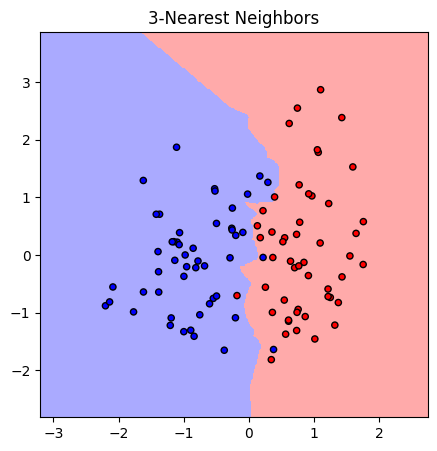

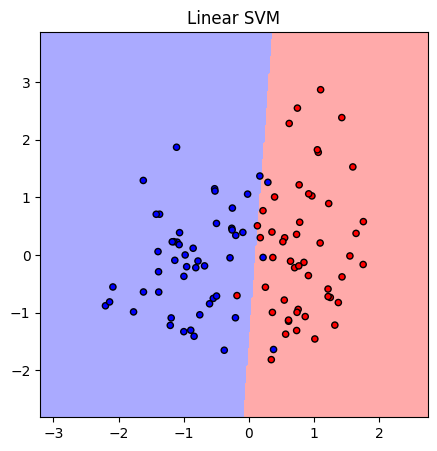

In [4]:
# Create a synthetic dataset
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1)
X2, y2 = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
X2 += 2 * rng.uniform(size=X.shape)
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X2 = scaler.fit_transform(X2)
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

def plot_decision_boundary(clf, X, y, title, filename="test.pdf"):
    # Fit the classifier
    clf.fit(X, y)

    # Set up the mesh for the background
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results
    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig(filename)
    plt.title(title)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1.0)

# Plot decision boundaries
plot_decision_boundary(knn, X, y, "3-Nearest Neighbors", filename="KNN.pdf")
plot_decision_boundary(svm, X, y, "Linear SVM", filename="svm.pdf")

plt.show()

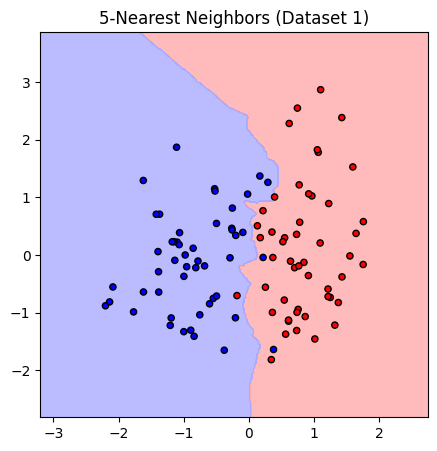

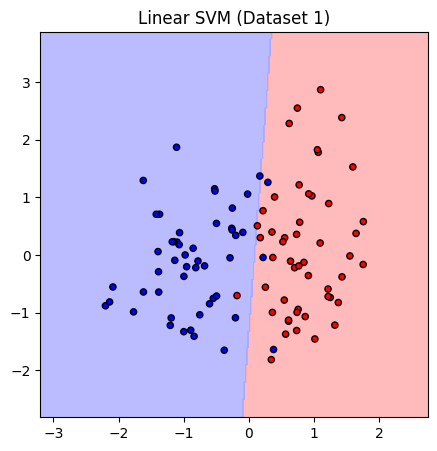

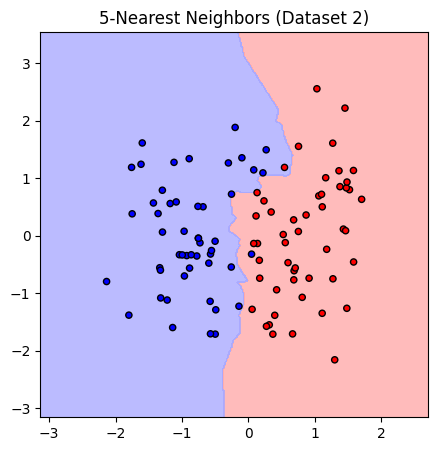

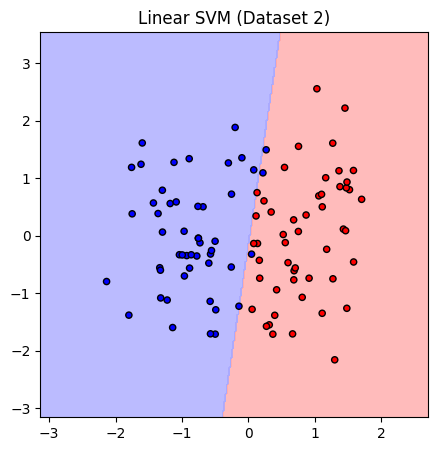

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Create synthetic datasets
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1)
X2, y2 = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                      random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
X2 += 2 * rng.uniform(size=X2.shape)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X2 = scaler.fit_transform(X2)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

def plot_decision_boundary(clf, X, y, title, filename=None):
    # Fit the classifier
    clf.fit(X, y)

    # Set up the mesh for the background
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results
    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show()

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1.0)

# Plot decision boundaries for the first dataset
plot_decision_boundary(knn, X, y, "5-Nearest Neighbors (Dataset 1)", filename="KNN1.pdf")
plot_decision_boundary(svm, X, y, "Linear SVM (Dataset 1)", filename="SVM1.pdf")

# Plot decision boundaries for the second dataset
plot_decision_boundary(knn, X2, y2, "5-Nearest Neighbors (Dataset 2)", filename="KNN2.pdf")
plot_decision_boundary(svm, X2, y2, "Linear SVM (Dataset 2)", filename="SVM2.pdf")

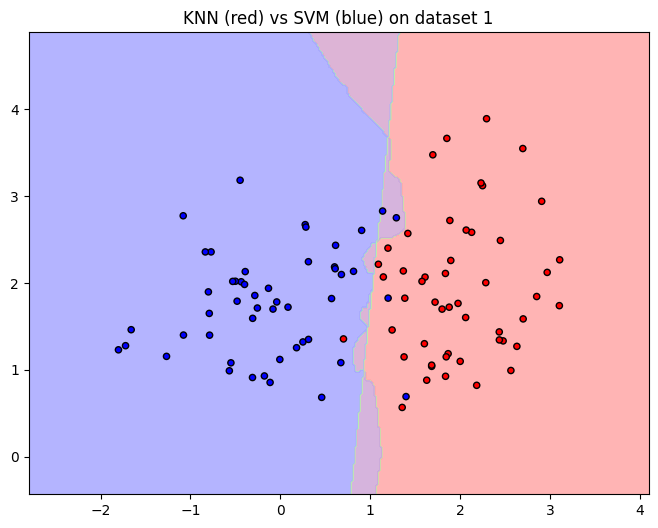

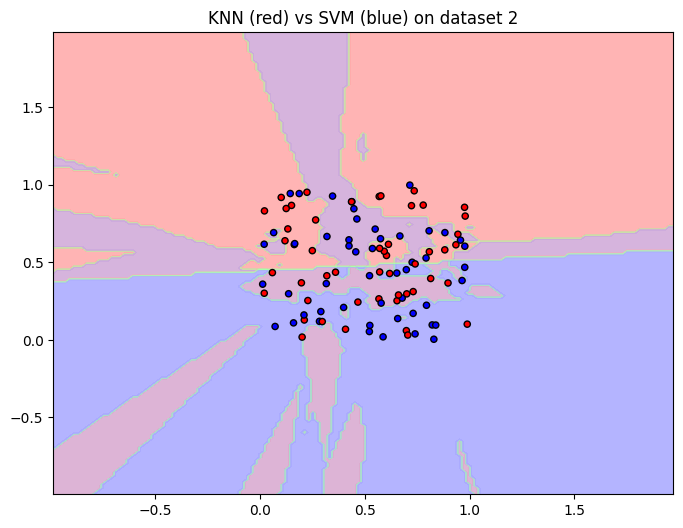

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Generate data where KNN performs well
np.random.seed(0)
X1, y1 = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X1 += 2 * rng.uniform(size=X1.shape)

# Generate data where SVM performs well
X2, y2 = np.random.rand(100, 2), np.where(np.random.rand(100) > 0.5, 0, 1)

# Train KNN and SVM on each dataset
knn = KNeighborsClassifier()
svm = SVC(kernel='linear')

for i, (X, y) in enumerate([(X1, y1), (X2, y2)]):
    # Train classifiers
    knn.fit(X, y)
    svm.fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z_knn = Z_knn.reshape(xx.shape)
    Z_svm = Z_svm.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_knn, cmap=cmap_light, alpha=0.8)
    plt.contourf(xx, yy, Z_svm, cmap=cmap_light, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN (red) vs SVM (blue) on dataset {}".format(i + 1))

plt.show()

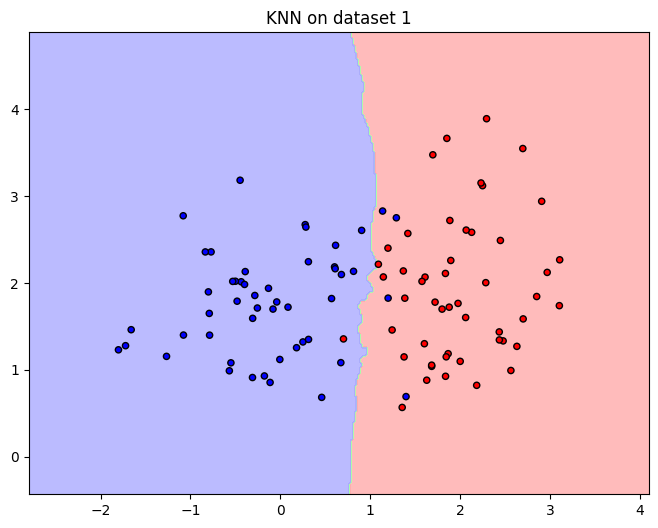

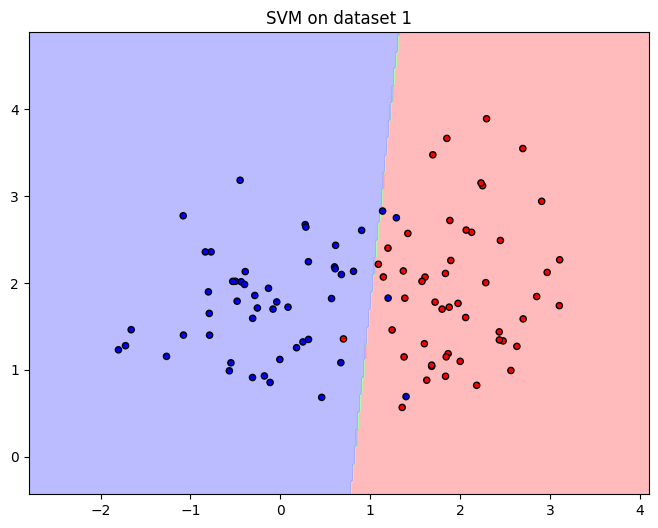

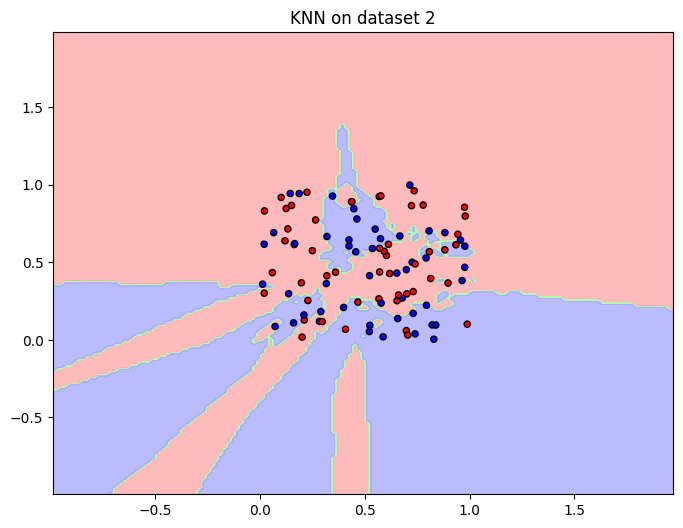

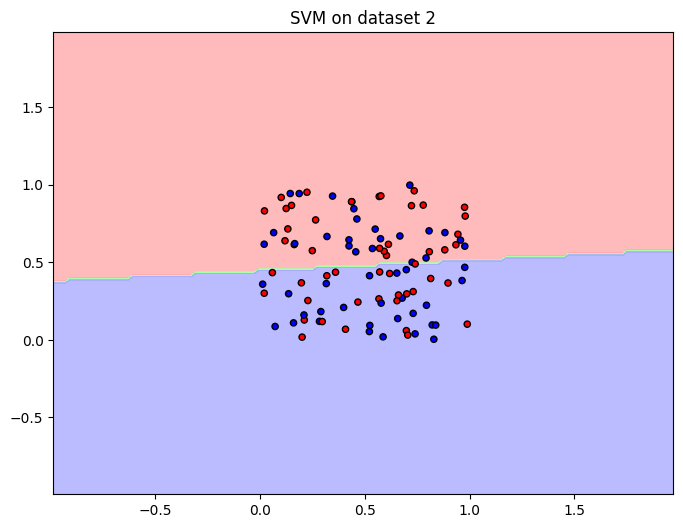

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Generate data where KNN performs well
np.random.seed(0)
X1, y1 = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X1 += 2 * rng.uniform(size=X1.shape)

# Generate data where SVM performs well
X2, y2 = np.random.rand(100, 2), np.where(np.random.rand(100) > 0.5, 0, 1)

# Train KNN and SVM on each dataset
knn = KNeighborsClassifier(n_neighbors=10)
svm = SVC(kernel='linear')

for i, (X, y) in enumerate([(X1, y1), (X2, y2)]):
    # Train classifiers
    knn.fit(X, y)
    svm.fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z_knn = Z_knn.reshape(xx.shape)
    Z_svm = Z_svm.reshape(xx.shape)

    # Plot KNN
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_knn, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN on dataset {}".format(i + 1))
    plt.show()

    # Plot SVM
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_svm, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM on dataset {}".format(i + 1))
    plt.show()